<a href="https://colab.research.google.com/github/Poojithasingh07/Federated-Learning-with-Neural-Water-Mark-Embedding/blob/main/Federated%20Learning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [3]:
import numpy as np
import pandas as pd

# Load .npy files
X = np.load("train_features.npy")
y = np.load("train_labels.npy")


# Convert to DataFrames
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=["target"])  # Add column name if needed


In [4]:
import numpy as np
import pandas as pd

X=np.load("test_features.npy")
X1_df = pd.DataFrame(X)
y=np.load("test_labels.npy")
y1_df = pd.DataFrame(y, columns=["target"])  # Add column name if needed


In [5]:
print("Shape of X_df:", X_df.shape)
print("Shape of y_df:", y_df.shape)

Shape of X_df: (24000, 64)
Shape of y_df: (24000, 1)


In [6]:
X1_df.head(),y1_df.head()

(    0    1    2    3    4    5    6    7    8    9   ...   54   55   56   57  \
 0  134  117  132  170  130  119  125  134  131  128  ...  130  135  153  143   
 1  108  120  129  158  127  162  139  137  132  112  ...  132  120  168  140   
 2  112  114  122  152  123  173  143  141  130  115  ...  128  121  185  145   
 3  142  122  129  172  131  128  125  131  132  130  ...  130  153  164  144   
 4  157   83  114  160  121  100  120  132  126  150  ...  128  170  168  141   
 
     58   59   60   61   62   63  
 0  121  153  156  156  137  126  
 1  122  140  127  151  124  130  
 2  120  145  120  150  118  129  
 3  129  167  155  151  148  123  
 4  121  165  160  151  130  127  
 
 [5 rows x 64 columns],
    target
 0      25
 1      19
 2      16
 3      21
 4       9)

In [7]:
X_df.shape ,y_df.shape

((24000, 64), (24000, 1))

In [8]:
X1_df.shape , y1_df.shape

((6000, 64), (6000, 1))

In [9]:
X1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6000 non-null   uint8
 1   1       6000 non-null   uint8
 2   2       6000 non-null   uint8
 3   3       6000 non-null   uint8
 4   4       6000 non-null   uint8
 5   5       6000 non-null   uint8
 6   6       6000 non-null   uint8
 7   7       6000 non-null   uint8
 8   8       6000 non-null   uint8
 9   9       6000 non-null   uint8
 10  10      6000 non-null   uint8
 11  11      6000 non-null   uint8
 12  12      6000 non-null   uint8
 13  13      6000 non-null   uint8
 14  14      6000 non-null   uint8
 15  15      6000 non-null   uint8
 16  16      6000 non-null   uint8
 17  17      6000 non-null   uint8
 18  18      6000 non-null   uint8
 19  19      6000 non-null   uint8
 20  20      6000 non-null   uint8
 21  21      6000 non-null   uint8
 22  22      6000 non-null   uint8
 23  23      6000 

In [10]:
y1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  6000 non-null   int64
dtypes: int64(1)
memory usage: 47.0 KB


In [85]:
y_df['target'] = (y_df['target'] > 0).astype(int)


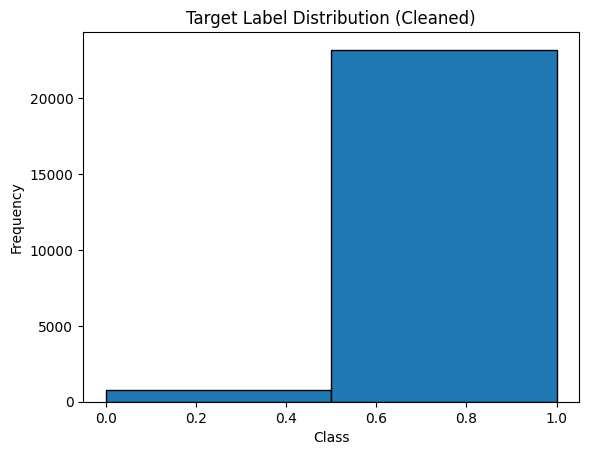

In [86]:
plt.hist(y_df['target'], bins=2, edgecolor='black')
plt.title('Target Label Distribution (Cleaned)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


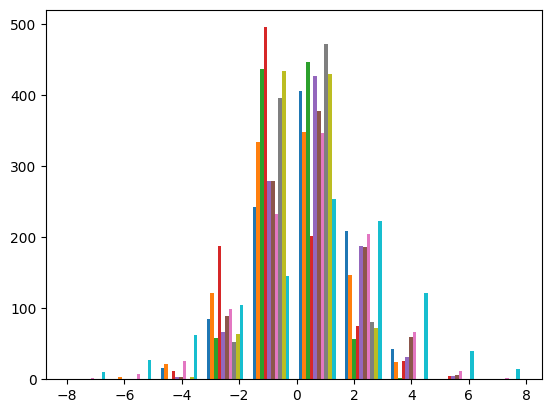

In [88]:
plt.hist(X1_df)
plt.show()



In [14]:
X1_df.value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
161  100  121  168  125  109  114  130  128  141  172  135  101  126  127  122  157  121  92   122  122  140  129  113  132  130  122  116  150  120  120  123  153  124  174  129  101  109  120  127  93   118  140  150  164  137  137  177  124  131  125  165  141  186  125  159  166  137  122  167  157  159  136  125    1
          116  157  124  127  128  141  127  156  191  124  118  134  122  120  150  123  128  116  131  121  124  127  138  130  122  107  159  130  146  99   160  134  168  126  88   127  129  129  111  111  147  165  148  147  174  158  133  127  123  129  153  156  131  153  186  141  117  160  146  164  129  126    1
     98   116  157  123  127  128  141  127  156  192  124  118  134  122  120  150  123  128  116  132  118  124  127  139  130  122  106  160  130  145  98   160  134  168  126  88   126  129  129  111  110  147  164  147  148  175  159  133  127  123  128  154  156  130  153  186  141  116  160  145  165  128  126    1
     96   113  160  122  106  121  130  128  146  182  137  114  128  123  131  155  121  127  122  126  121  129  119  155  132  116  122  159  136  115  113  137  130  176  125  83   118  124  127  107  100  139  130  147  152  149  185  132  129  120  139  142  143  131  168  164  142  120  163  157  150  135  129    1
     95   112  155  122  102  118  130  128  145  177  135  108  128  125  129  159  122  117  123  124  114  130  116  159  131  114  122  157  134  103  117  131  130  175  125  88   114  122  127  105  102  139  127  148  153  143  188  130  129  120  144  143  155  128  170  159  145  121  160  158  149  134  130    1
                                                                                                                                                                                                                                                                                                                                 ..
60   138  125  158  123  189  129  128  123  63   95   148  101  121  148  157  71   123  119  98   122  194  132  123  110  130  123  144  119  127  151  153  127  127  123  127  138  107  121  128  129  134  107  133  145  88   156  192  123  123  123  181  97   154  130  65   155  132  117  152  119  168  134  121    1
56   138  128  158  126  184  127  128  124  68   97   145  102  122  144  152  75   123  114  101  120  191  132  121  109  129  125  138  120  120  148  158  130  123  124  129  143  104  123  124  124  139  110  134  149  90   154  192  122  123  123  183  102  166  130  64   156  135  118  142  117  168  137  123    1
55   171  120  115  114  178  156  134  130  101  90   143  117  124  142  152  53   119  152  110  124  160  121  134  117  122  138  154  112  143  155  141  133  125  140  124  158  115  112  126  173  171  96   137  116  111  147  168  119  116  122  156  100  128  118  84   169  143  136  122  87   162  132  127    1
53   185  119  112  112  173  153  132  130  107  91   142  117  124  140  152  56   117  151  116  124  167  119  127  118  123  143  153  108  141  149  135  133  122  148  121  153  106  109  127  175  170  94   138  115  116  136  171  120  115  122  153  99   130  117  88   168  143  134  119  87   167  135  124    1
52   218  106  89   106  157  147  133  121  128  105  124  121  117  148  150  42   113  163  116  118  157  117  101  119  112  144  188  92   150  146  107  122  116  166  115  141  109  93   127  201  158  94   140  70   121  139  175  111  102  124  137  91   133  105  90   178  134  131  126  59   176  132  121    1
Name: count, Length: 6000, dtype: int64

In [15]:
y1_df.value_counts()

,count
target,
0,200
1,200
2,200
3,200
4,200
5,200
6,200
7,200
8,200


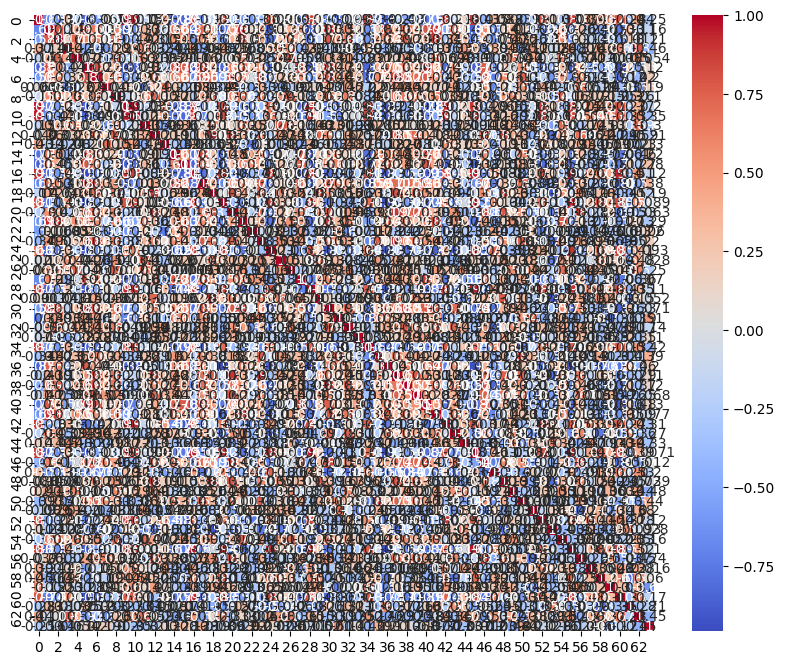

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(X1_df.corr(), annot=True, cmap='coolwarm')
plt.show()

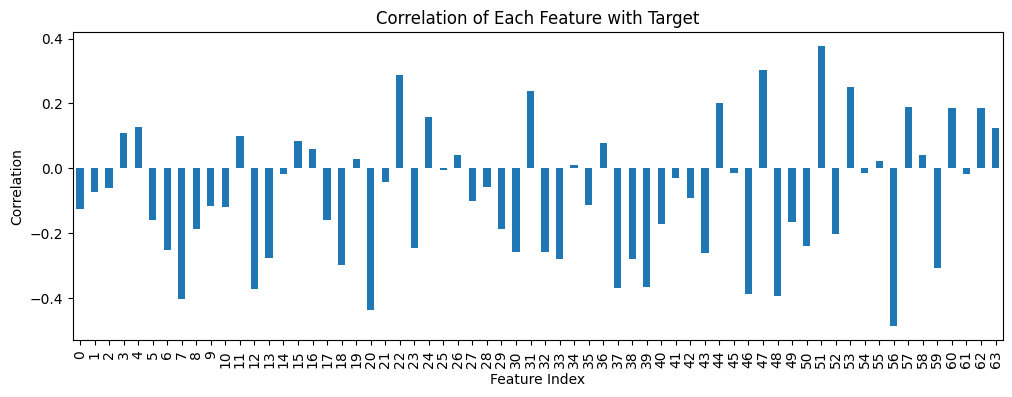

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load test labels and convert to DataFrame
y = np.load("test_labels.npy")
y1_df = pd.DataFrame(y, columns=["target"])

# Combine features + target
# Assuming X1_df is already defined from a previous cell (e.g., cell 3fjzR00nkDqW)
# If not, you would need to load it here as well:
# X = np.load("test_features.npy")
# X1_df = pd.DataFrame(X)
df = X1_df.copy()
df['target'] = y1_df['target']

# Correlation with target
correlations = df.corr()['target'].drop('target')

plt.figure(figsize=(12, 4))
correlations.plot(kind='bar')
plt.title("Correlation of Each Feature with Target")
plt.xlabel("Feature Index")
plt.ylabel("Correlation")
plt.show()

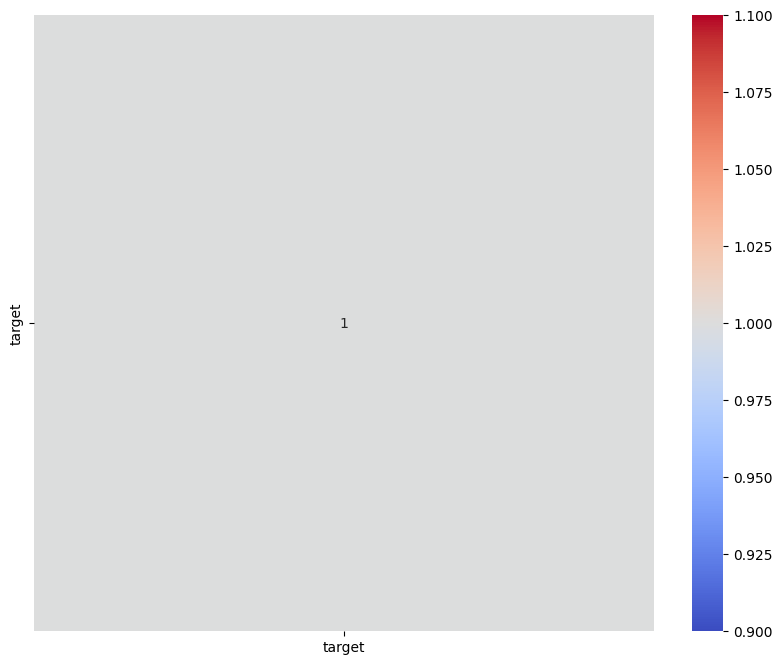

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y=np.load("test_labels.npy")
X1_df_df = pd.DataFrame(y, columns=["target"])

plt.figure(figsize=(10, 8))
sns.heatmap(y1_df.corr(), annot=True, cmap='coolwarm')
plt.show()

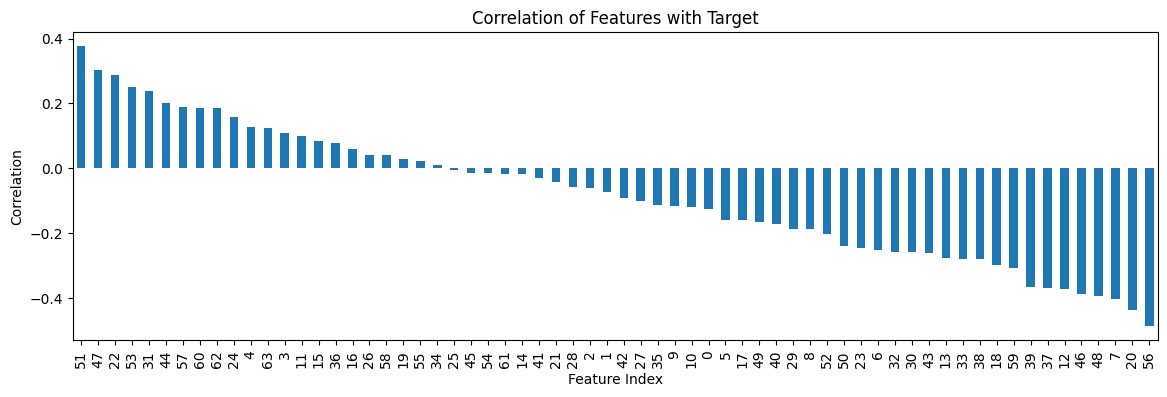

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load test features and convert to DataFrame
X_test_features = np.load("test_features.npy")
X1_df = pd.DataFrame(X_test_features)

# Load training labels and convert to DataFrame
y_train_labels = np.load("train_labels.npy")
y_df = pd.DataFrame(y_train_labels, columns=["target"])


combined_df = X1_df.copy()
combined_df['target'] = y_df['target']
plt.figure(figsize=(14, 4))
correlations['target'].drop('target').sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation of Features with Target")
plt.xlabel("Feature Index")
plt.ylabel("Correlation")
plt.show()

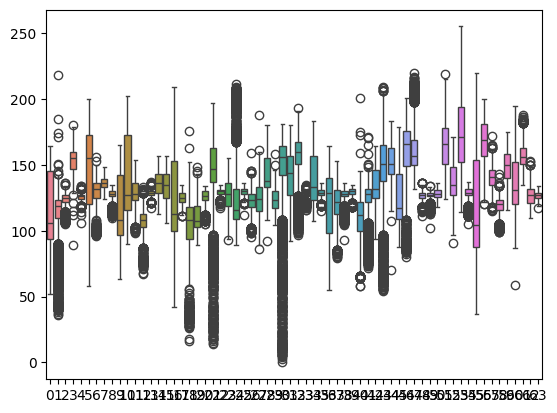

In [8]:
sns.boxplot(data=X1_df)
plt.show()

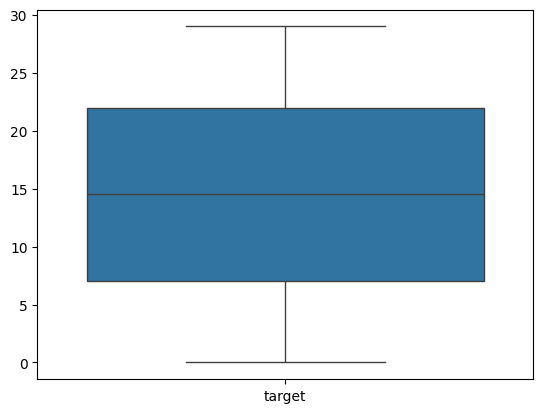

In [9]:
sns.boxplot(data=y1_df)
plt.show()

In [14]:
import numpy as np
import pandas as pd

# Load .npy files
X = np.load("train_features.npy")
y = np.load("train_labels.npy")
X1 = np.load("test_features.npy")
y1 = np.load("test_labels.npy")

# Convert to DataFrames
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=["target"])  # Add column name if needed

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19200, 64), (4800, 64), (19200, 1), (4800, 1))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(64,))  # <-- First hidden layer - Corrected input shape
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
X_train.shape[1]

64

In [25]:
from re import A
A=X_train.shape[1]

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),  # First hidden layer (Layer 1) - Corrected input shape
    Dense(32, activation='relu'),                     # Second hidden layer (Layer 2)
    Dense(1, activation='sigmoid')                    # Output layer (binary output)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,273 (24.50 KB)

 Trainable params: 6,273 (24.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0348 - loss: -1299092.1250 - val_accuracy: 0.0305 - val_loss: -21030396.0000
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0346 - loss: -44962860.0000 - val_accuracy: 0.0305 - val_loss: -161400464.0000
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0335 - loss: -231733248.0000 - val_accuracy: 0.0305 - val_loss: -501429888.0000
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0329 - loss: -638849792.0000 - val_accuracy: 0.0305 - val_loss: -1089191424.0000
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0363 - loss: -1300699392.0000 - val_accuracy: 0.0305 - val_loss: -1956140800.0000
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0337 - loss: -2261015552.0000 - val_accuracy: 0.0305 - val_loss: -3126126848.0000
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0346 - loss: -3532182528.0000 - val_accuracy: 0.0305 - va

In [30]:
accuracy_score=model.evaluate(X_test,y_test)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0305 - loss: -63185735680.0000


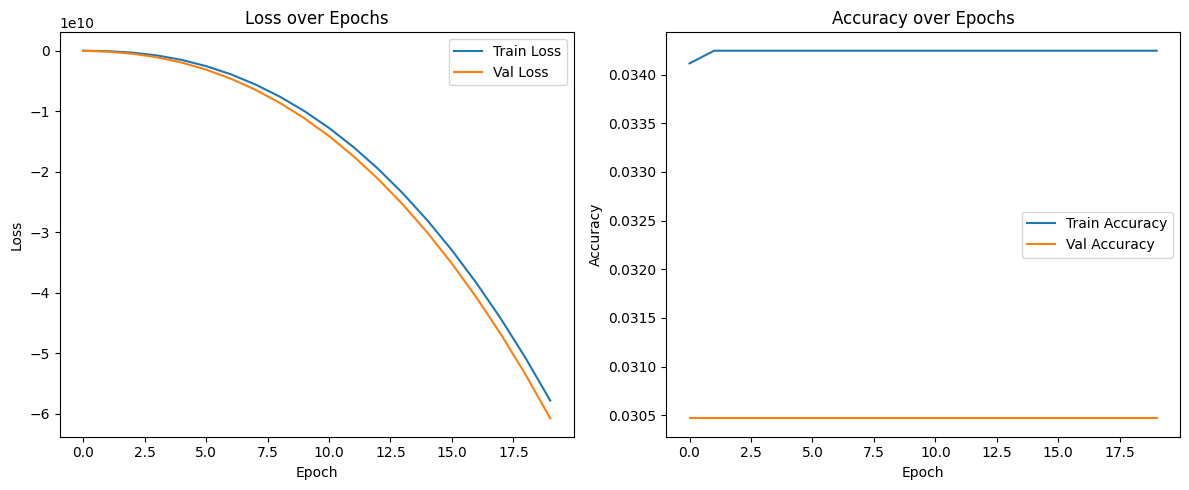

In [31]:
# Plotting training history
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
optimizer=Adam(learning_rate=0.0001)


In [38]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0305 - loss: -10877208576.0000
Test Loss: -10828580864.0000
Test Accuracy: 0.0327


In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
import pandas as pd
print(pd.Series(y_train['target']).value_counts())

target
5     666
18    659
13    656
8     654
2     653
20    650
15    650
3     650
6     646
1     643
26    643
9     643
12    643
14    643
7     641
21    639
10    639
11    639
29    637
25    633
16    632
24    632
22    631
17    629
4     629
0     629
28    626
19    625
23    622
27    618
Name: count, dtype: int64


In [50]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Data generation
X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.5000 - loss: 0.7316 - val_accuracy: 0.6875 - val_loss: 0.6221
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5938 - loss: 0.6723 - val_accuracy: 0.6875 - val_loss: 0.6043
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6562 - loss: 0.6338 - val_accuracy: 0.7500 - val_loss: 0.5881
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7188 - loss: 0.6025 - val_accuracy: 0.7500 - val_loss: 0.5731
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7292 - loss: 0.5751 - val_accuracy: 0.7500 - val_loss: 0.5596
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7917 - loss: 0.5441 - val_accuracy: 0.6250 - val_loss: 0.5460
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8750 - loss: 0.5091 - val_accuracy: 0.6250 - val_loss: 0.5332
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8958 - loss: 0.4809 - val_accuracy: 0.6875 - val_loss: 0.5212
Epoch 9/20

2 layer NN model


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [53]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=42)

In [54]:
print("Unique labels:", np.unique(y))

Unique labels: [0 1]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Layer 1
    Dense(32, activation='relu'),                             # Layer 2
    Dense(1, activation='sigmoid')                            # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [58]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4929 - loss: 0.7178 - val_accuracy: 0.7250 - val_loss: 0.5939
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6979 - loss: 0.6025 - val_accuracy: 0.8750 - val_loss: 0.5121
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7920 - loss: 0.5326 - val_accuracy: 0.8813 - val_loss: 0.4494
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8406 - loss: 0.4682 - val_accuracy: 0.9062 - val_loss: 0.3994
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8652 - loss: 0.4335 - val_accuracy: 0.9187 - val_loss: 0.3574
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8867 - loss: 0.3886 - val_accuracy: 0.9250 - val_loss: 0.3247
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8678 - loss: 0.3715 - val_accuracy: 0.9375 - val_loss: 0.3000
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8601 - loss: 0.3515 - val_accuracy: 0.9438 - val_loss

In [59]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

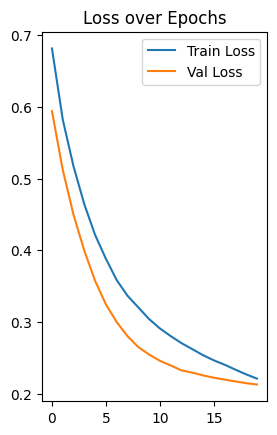

In [60]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()


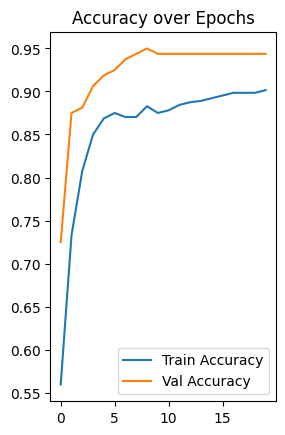

In [61]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

In [62]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f} | Test Accuracy: {acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9329 - loss: 0.1877 

Test Loss: 0.2049 | Test Accuracy: 0.9150


3 Layer NN model
bold text


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [90]:
X_new, y_new = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=42)

In [65]:
print("Unique labels:", np.unique(y))

Unique labels: [0 1]


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),  # Layer 1
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')                            # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [71]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6964 - loss: 0.6607 - val_accuracy: 0.8750 - val_loss: 0.5811
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8408 - loss: 0.5669 - val_accuracy: 0.9187 - val_loss: 0.4660
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8845 - loss: 0.4455 - val_accuracy: 0.9187 - val_loss: 0.3480
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8837 - loss: 0.3461 - val_accuracy: 0.9312 - val_loss: 0.2797
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8792 - loss: 0.3115 - val_accuracy: 0.9438 - val_loss: 0.2484
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9016 - loss: 0.2550 - val_accuracy: 0.9375 - val_loss: 0.2329
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8891 - loss: 0.2456 - val_accuracy: 0.9250 - val_loss: 0.2333
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9169 - loss: 0.2167 - val_accuracy: 0.9375 - val_loss

In [73]:
accuracy_score=model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9582 - loss: 0.1447  


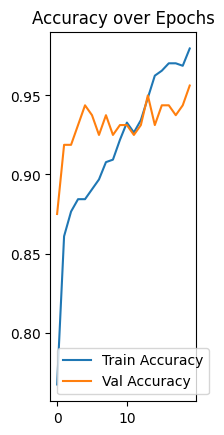

In [75]:
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

**4 layer NN model
**

In [76]:
odel = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),  # Layer 1 (hidden)
    Dense(64, activation='relu'),                      # Layer 2 (hidden)
    Dense(32, activation='relu'),                      # Layer 3 (hidden)
    Dense(16, activation='relu'),                      # Layer 4 (hidden)
    Dense(1, activation='sigmoid')                     # Output layer (binary)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,833 (50.13 KB)

 Trainable params: 12,833 (50.13 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.fit(X_train, y_train, epochs=10, batch_size=40, validation_split=0.2)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9949 - loss: 0.0091 - val_accuracy: 0.9563 - val_loss: 0.4221
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9500 - val_loss: 0.4442
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9563 - val_loss: 0.4512
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9500 - val_loss: 0.4648
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9563 - val_loss: 0.4623
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9563 - val_loss: 0.4698
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9563 - val_loss: 0.4775
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9500 - val_loss

In [79]:
history=model.fit(X_train, y_train, epochs=10, batch_size=40, validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9563 - val_loss: 0.5038
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9500 - val_loss: 0.5151
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9500 - val_loss: 0.5211
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9563 - val_loss: 0.5243
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9500 - val_loss: 0.5324
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9500 - val_loss: 0.5402
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9563 - val_loss: 0.5417
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9500 - val_lo

In [80]:
accuracy=model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9535 - loss: 0.3659 


In [81]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

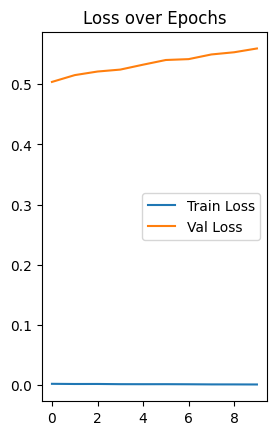

In [82]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

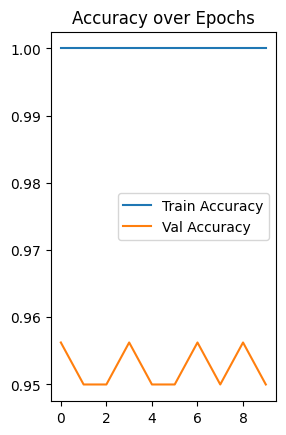

In [83]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

In [107]:
accuracy=model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9535 - loss: 0.3659 


In [106]:
accuracy=model.evaluate(X_train,y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0142     
